# 9.1 matplotlib API入门

In [79]:
# 加下面这句才会显示图
%matplotlib inline
import matplotlib.pyplot as plt
# 对于复杂的图表，必须将所有绘图命令放在单个notebook单元格中.

<IPython.core.display.Javascript object>


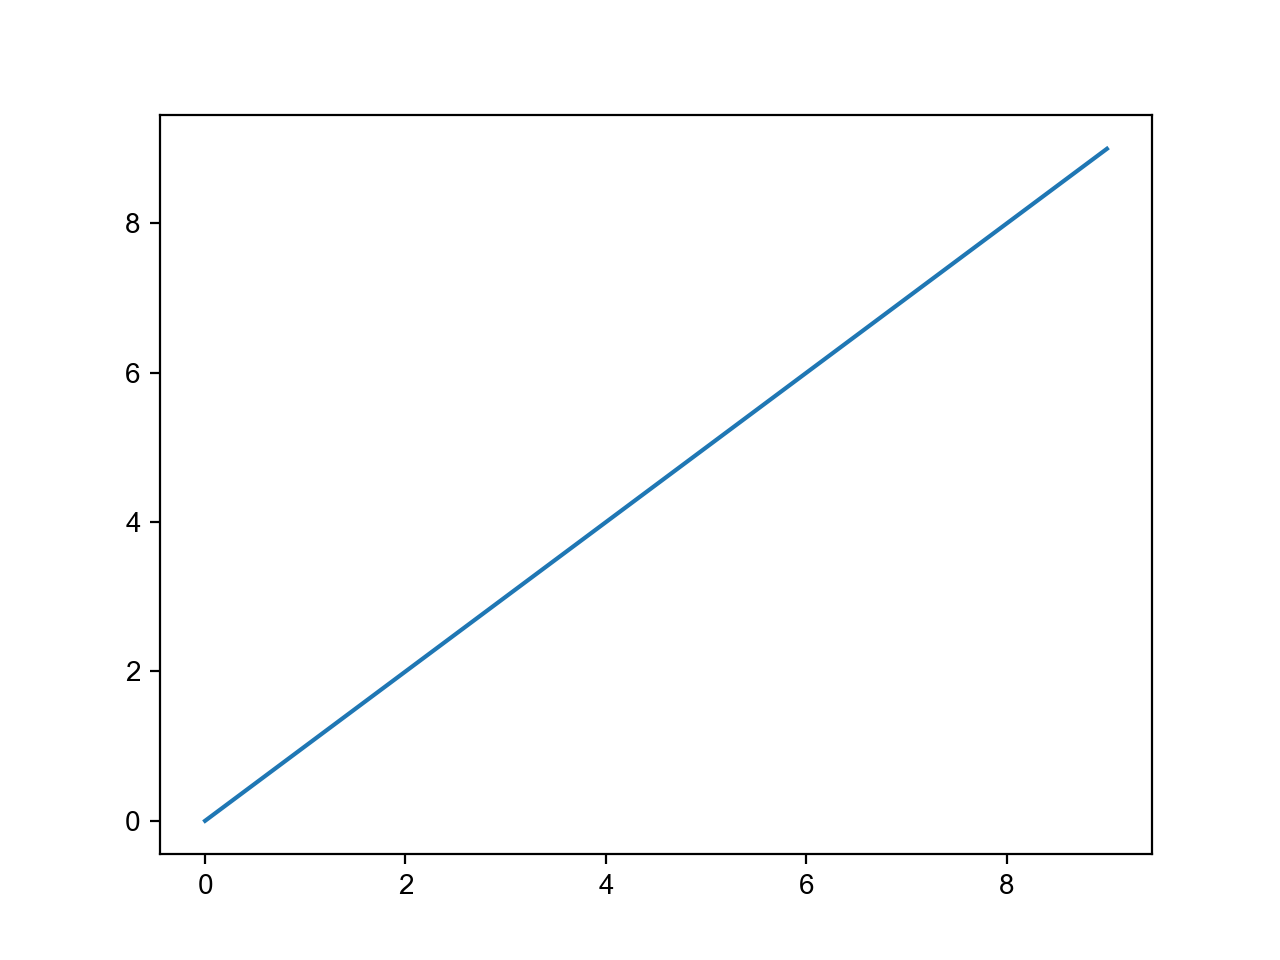

In [8]:
# easy demo
import numpy as np

data = np.arange(10)
plt.plot(data)

### 9.1.1 图片与子图

<IPython.core.display.Javascript object>


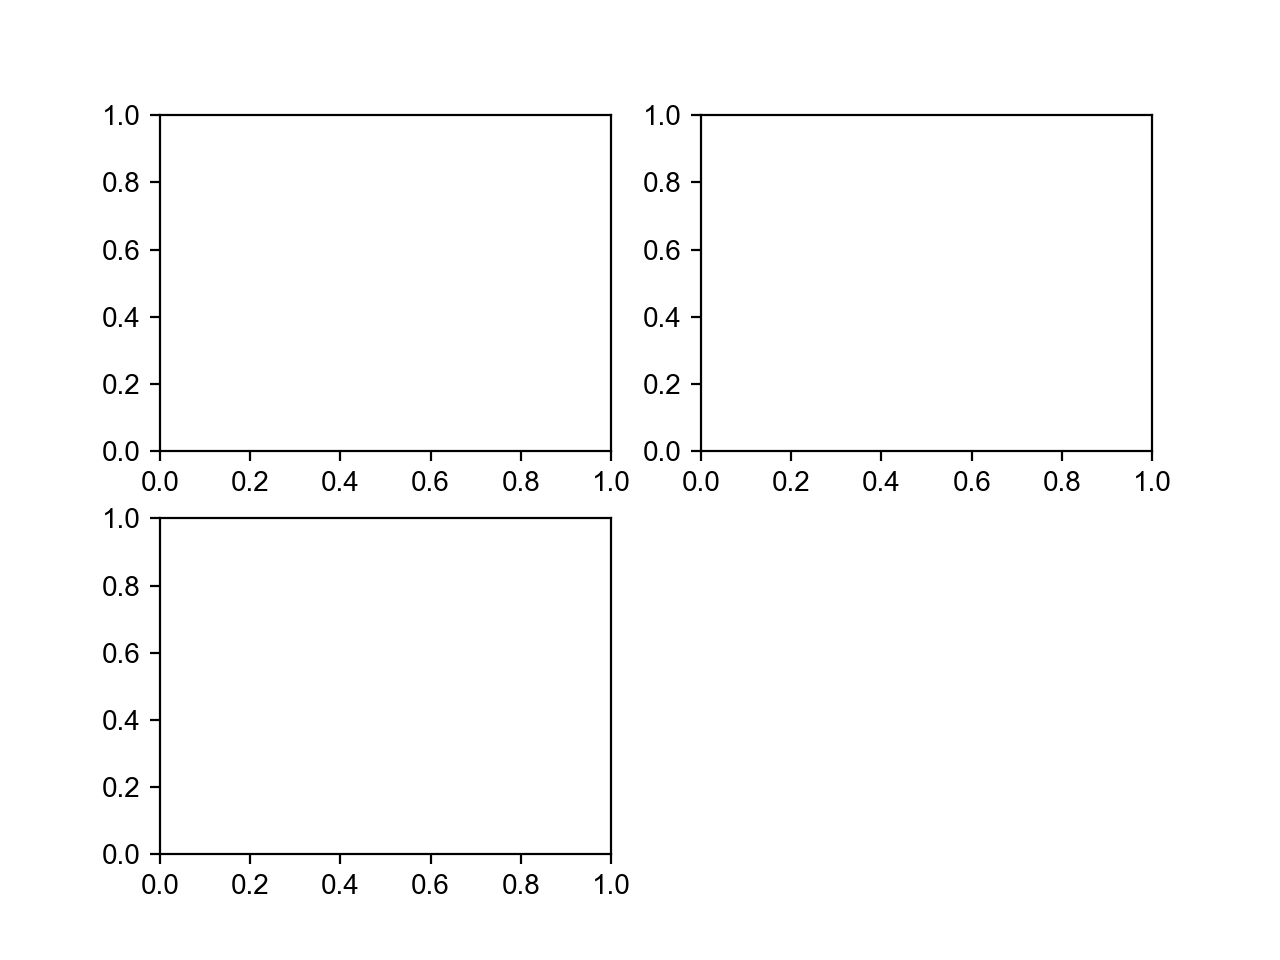

In [12]:
# matplotlib 绘制的图位于图片（Figure）对象中.
# 不能对空白图片进行绘图，需要使用 add_subplot 创建一个或多个子图

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


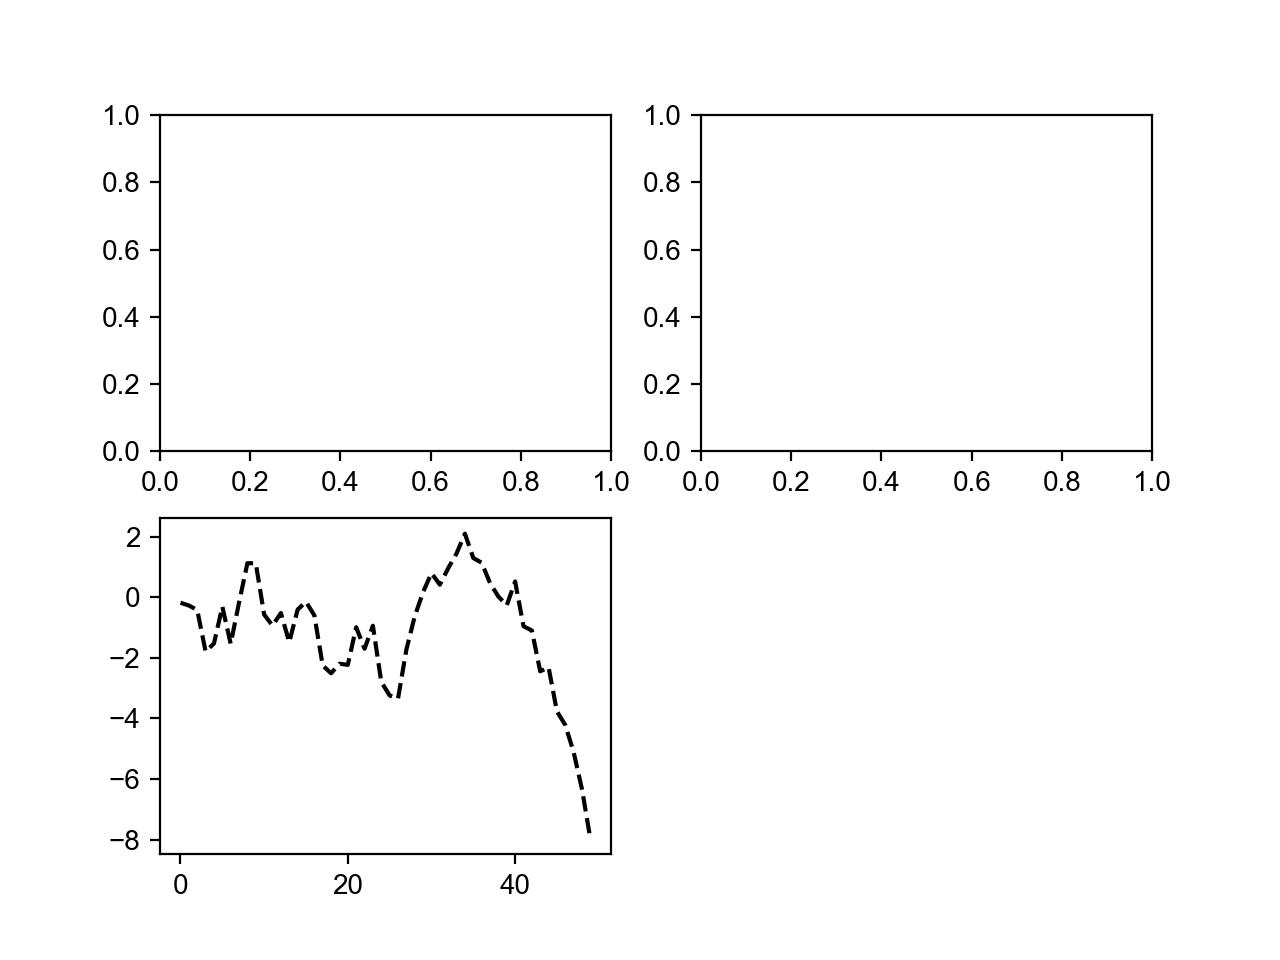

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 输入绘图命令，默认在最后一个图片和子图上进行绘制.
# cumsum() 就是当前列之前的和加到当前列上.
plt.plot(np.random.randn(50).cumsum(), 'k--')

<IPython.core.display.Javascript object>


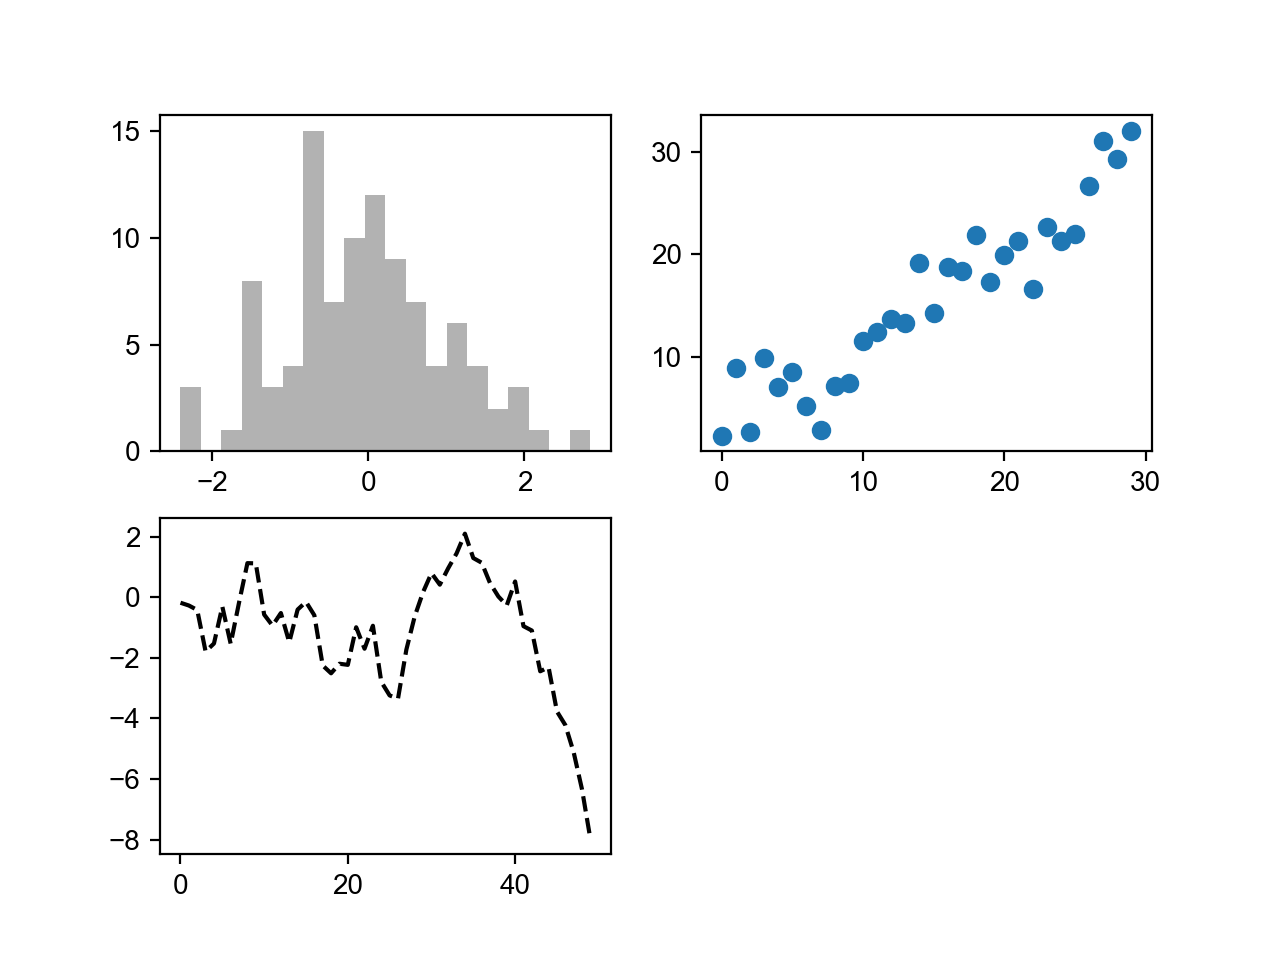

In [24]:
# 绘制直方图
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
# 绘制散点图
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

<IPython.core.display.Javascript object>


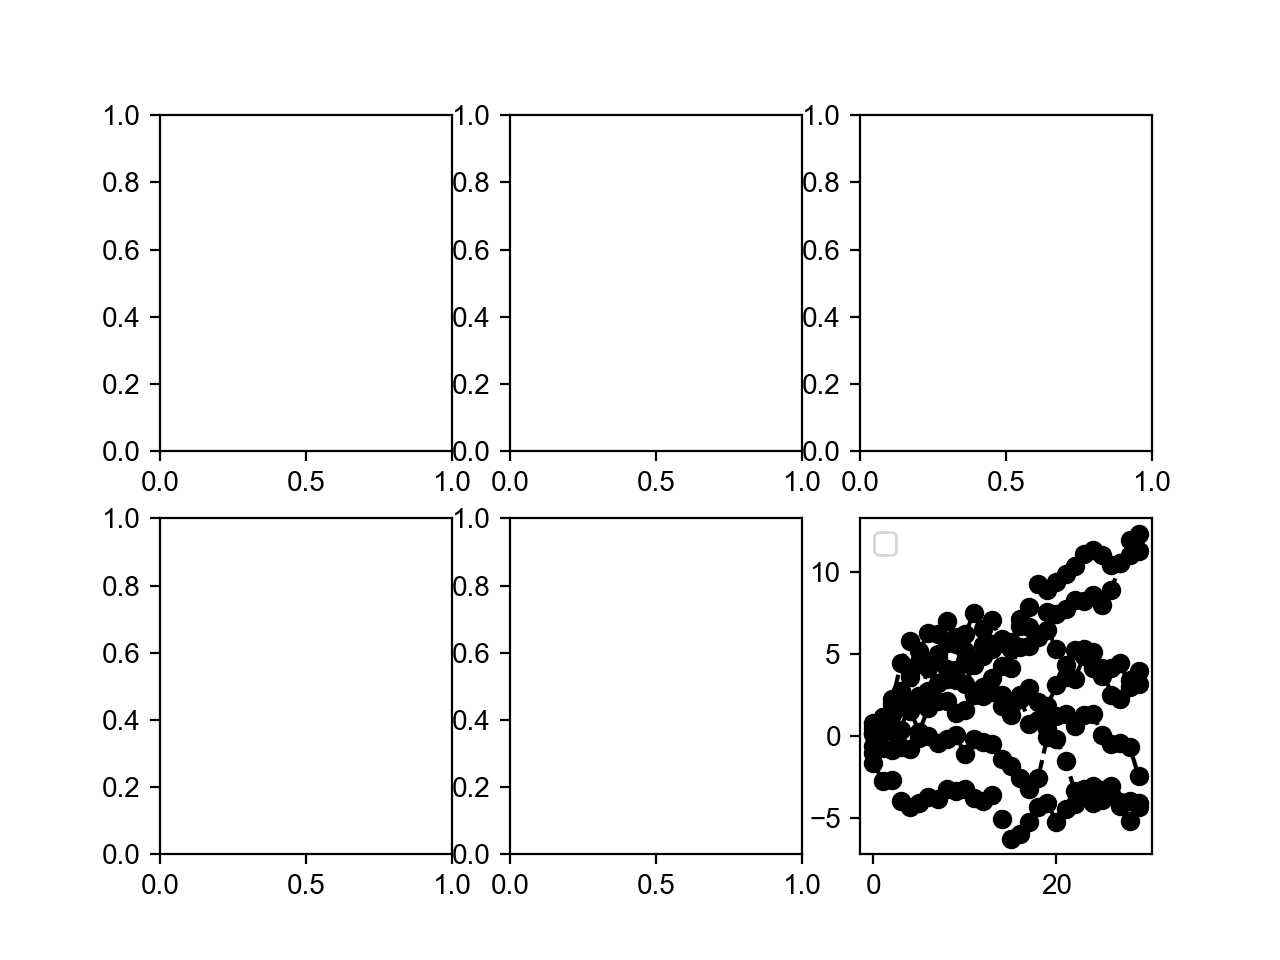

(<Figure size 640x480 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123215b90>,
       dtype=object))

In [26]:
# 便捷方法 plt.subplots , 创建一个新的图片，并返回已生成子图对象的NumPy数组
plt.subplots(2, 3)

In [27]:
# 数组axes可以索引，非常方便
axes[0, 1]

#####  9.1.1.1 调整子图周围的间距

<IPython.core.display.Javascript object>


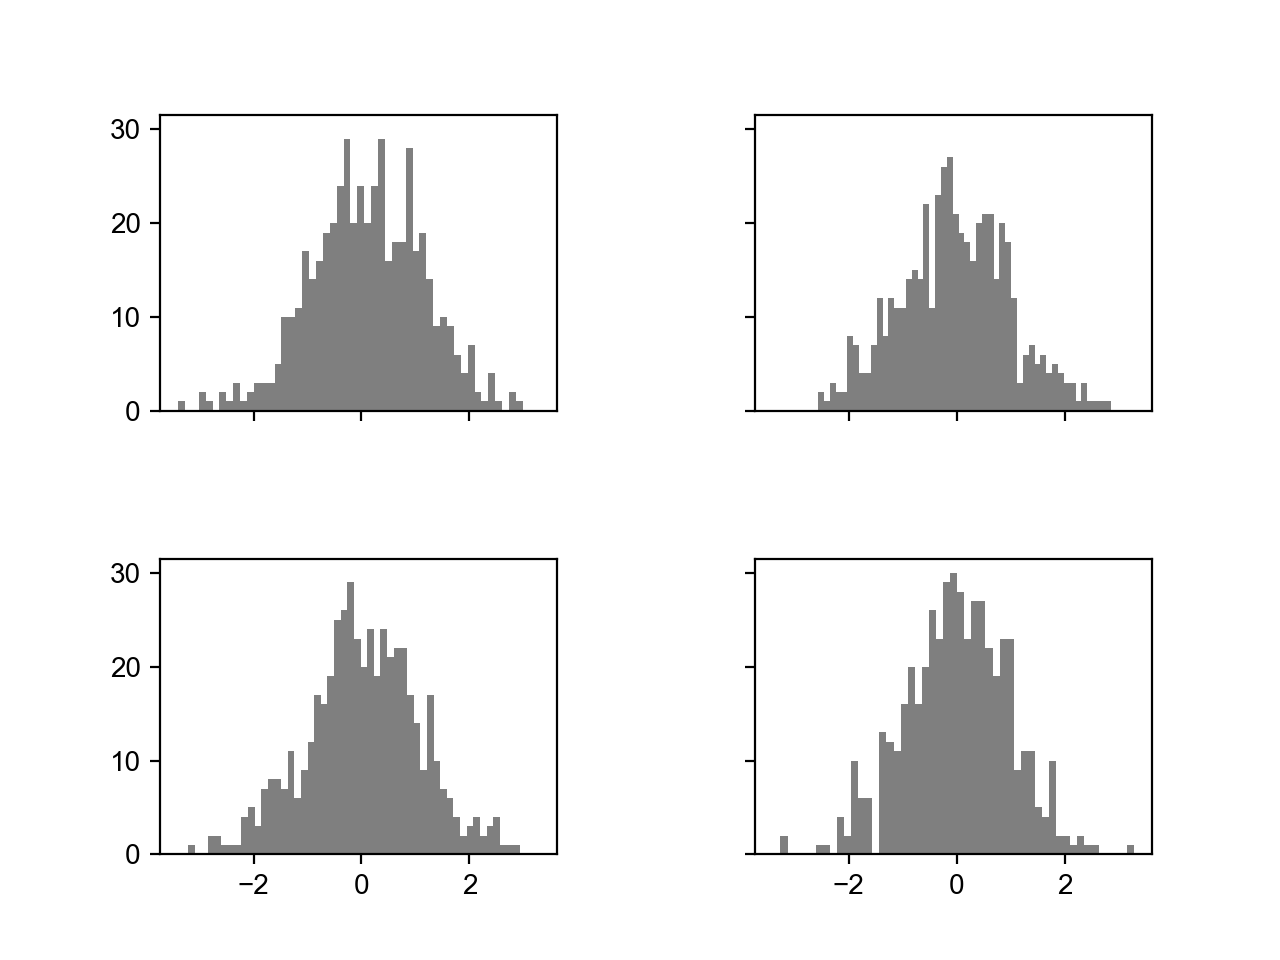

In [30]:
# 使用图对象的subplots_adjust更改间距，属性wspace和hspace分别控制图片的宽度和高度的百分比
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### 9.1.2 颜色、标记和线类型

In [31]:
# plot函数接收带有x和y的数组以及一些可选的字符串缩写参数来指明颜色和线类型.

In [32]:
# ax.plot(x, y, 'g--')
# 也可以显式表达  ax.plot(x, y, linestyle='--', color='g')

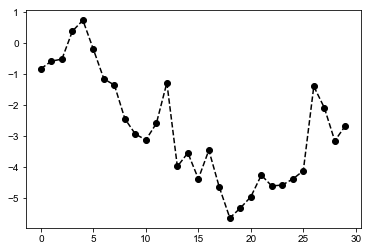

In [42]:
# 折线图有标记用来凸显实际的数据点.
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
plt.show()

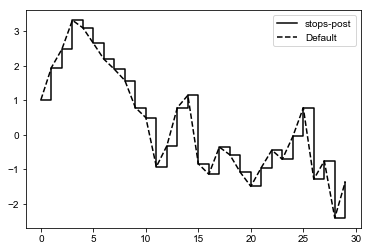

In [49]:
# 显示图例用来区分线，loc表示生成的位置

data = np.random.randn(30).cumsum()
plt.plot(data, 'k-', drawstyle='steps-post', label='stops-post')
plt.plot(data, 'k--', label='Default')
plt.legend(loc='best')

### 9.1.3 刻度、标签和图例
图表修饰工作，有两种主要方式：
1、使用程序性的pyplot接口（matplotlib.pyplot）
2、面向对象的原生matplotlib API

In [50]:
# 方法会在当前活动的或最近创建的AxesSubplot上生效.

##### 9.1.3.1 设置标题、轴标签、刻度和刻度标签

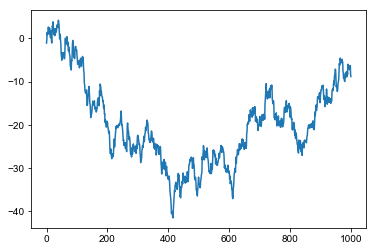

In [52]:
# 绘制随机漫步
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

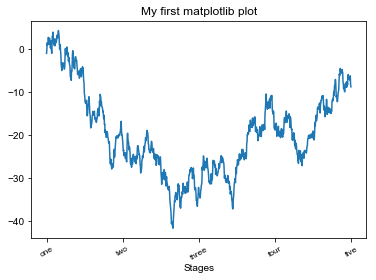

In [55]:
# 使用 set_xticks 和 set_xticklabels 改变x轴的刻度.
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
# 使用 set_xlabel 给x轴一个名称； 使用 set_title 给子图一个标题.
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

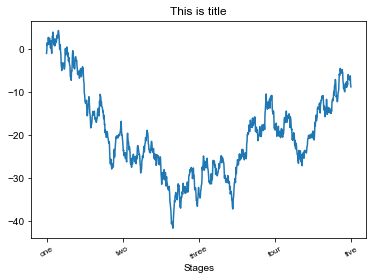

In [57]:
# 轴的类型 set方法，可以批量设置绘图属性.
props = {
    'title': 'This is title',
    'xlabel': 'Stages'
}
ax.set(**props)
fig

##### 9.1.3.2 添加图例
图例是区分绘图元素的重要内容.

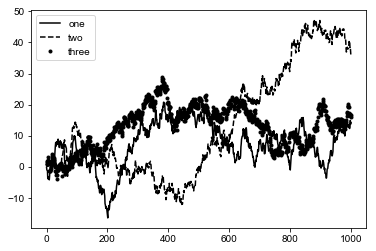

In [60]:
# 必须有 ax.legend 才会显示图例，loc属性确定图例的位置，best会自动选择最合适的位置.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 9.1.4 注释与子图加工
为图表添加注释，可能包含文本、箭头或其他图形.
使用text、arrow和annote方法来添加注释和文本.

In [62]:
# text 在图表上给定坐标（x，y）
#  eg:  ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

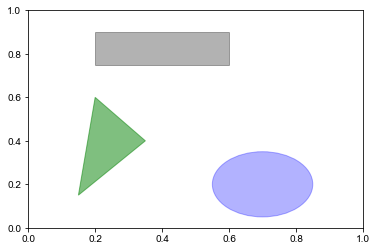

In [64]:
# 在图表中添加图形，需要生成patch对象shp，并调用ax.add_patch（shp）将其加入到子图中.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 将图片保存到文件

In [70]:
# 使用plt.savefig将活动图片保存到文件.

fig.savefig('examples/figpath.png', dip=400, bbox_inches='tight')
plt.savefig('examples/pltpath.png', dip=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### 9.1.6 matplotlib 设置

[]

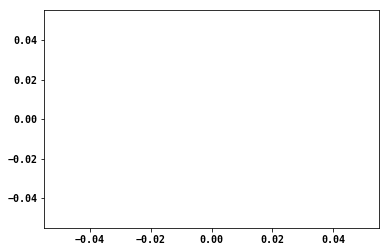

In [77]:
# 使用rc方法是修改配置的一种方式.
# rc第一个参数是要自定义的组件，如 figure,axes,xtick,ytick,grid,legend等.
# 之后按照关键字参数的序列指定新参数.

# 字典是设置选项的简单方式
font_options = {'family': 'monospace',
                'weight': 'bold', 
                'size': '10.0'}
plt.rc('font', **font_options)
plt.plot()

# 9.2 使用pandas和seaborn绘图
matplotlib是相当底层的工具.
pandas自身有很多自建方法简化从DataFrame和Series对象生成可视化的过程.
seaborn库提高图表的可读性和美观性.

In [80]:
import pandas as pd

##### 9.2.1 折线图
Series和DataFrame都有plot属性用于绘制基本图形.
默认plot()绘制的是折线图.

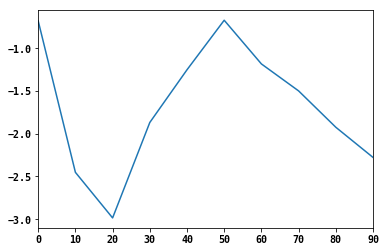

In [90]:
# Series对象的索引默认作为x轴，传入 use_index=False 禁用.
# x轴的刻度和范围可以通过 xticks 和 xlim 选项进行调整.
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

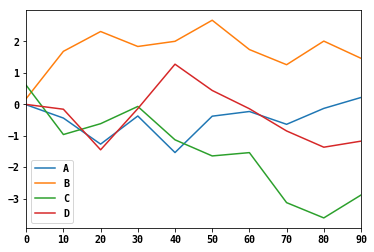

In [88]:
# pandas绘画方法，接收可选的ax对象，可以在网格布局中放置子图.
# DataFrame demo
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

In [91]:
# plot()方法包含不同绘画类型的方法族.
# df.plot() 等价于 df.plot.line()
# plot的方法参数 看书P261

### 9.2.2 柱状图
plot.bar()和plot.barh()可以分别绘制垂直和水平的柱状图.

In [92]:
# Series或DataFrame的索引将会被用作x轴刻度（bar）或y轴刻度（barh）

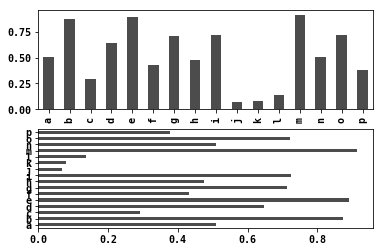

In [98]:
# Series Demo
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16),   # rand得到都是正数
                 index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)  # 索引在x轴
data.plot.barh(ax=axes[1], color='k', alpha=0.7)  # 索引在y轴

In [99]:
# DataFrame Demo
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.187349,0.041061,0.301024,0.892110
two,0.800343,0.188924,0.326319,0.846807
three,0.868348,0.410358,0.337301,0.945966
four,0.646192,0.621936,0.076511,0.798875
five,0.652767,0.747646,0.123899,0.359242
six,0.987538,0.631794,0.250827,0.477547


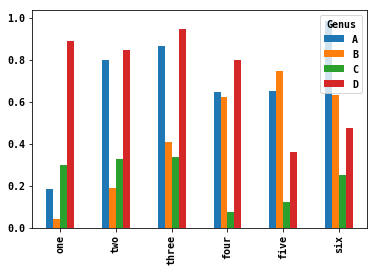

In [102]:
# DataFrame的列名称被用作了图例标题.
df.plot.bar()

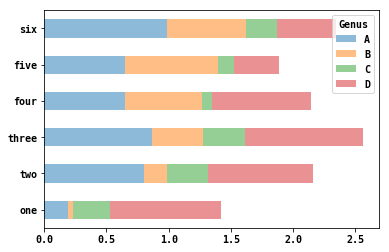

In [103]:
# 可以通过 stacked=True 生成堆积柱状图.
df.plot.barh(stacked=True, alpha=0.5)

### 9.2.3 直方图和密度图

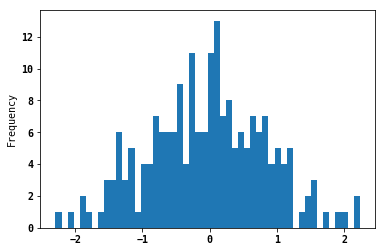

In [129]:
# hist方法绘制直方图
s = pd.Series(np.random.normal(0, 1, size=200))
s.plot.hist(bins=50)
#s.plot.kde()

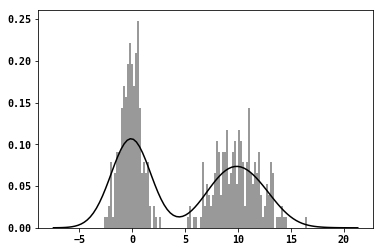

In [130]:
# kde方法使用传统法定混合法估计绘制密度图
# seaborn的distplot方法可以绘制直方图和连续密度估计

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 9.2.4 散点图或点图
使用seaborn的regplot方法可以绘制散点图.

In [131]:
# 在探索性数据分析中，能够查看一组变量中的所有散点图是有帮助的，称为成对图或散点图矩阵.
# seaborn有一个pairplot函数，支持在对象线上放置每个变量的直方图或密度估计值.

### 9.2.5 分面网格和分类数据

In [132]:
# seaborn的factorplot函数，可以简化多种分面绘制.
# eg: sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker'bar', data=df)
# 见书P271

# 可以使用seaborn.FacetGrid类创建自己的分面网格图

# 9.3 其他Python可视化工具 

In [ ]:
# web浏览器中创建动态的、交互的图像工作
#    例如：Bokeh、Plotly
# 印刷或网页的静态图形
#    例如：matplotlib、pandas、seaborn